In [4]:
import numpy as np
import scipy as sp
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from skimage.transform import resize, downscale_local_mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import zipfile as zf
import pandas as pd
# import cv2
import PIL as pil

In [2]:
archive = zf.ZipFile('data/archive.zip')

metafile  = archive.open('Meta.csv')
testfile  = archive.open('Test.csv')
trainfile = archive.open('Train.csv')

meta  = pd.read_csv(metafile)
test  = pd.read_csv(testfile)
train = pd.read_csv(trainfile)

train_images = [ mpl.image.imread(archive.open(imfile)) for imfile in train.Path]
train_labels = np.array(train.ClassId)

test_images = [ mpl.image.imread(archive.open(imfile)) for imfile in test.Path]
test_labels = np.array(test.ClassId)

In [39]:
#     img /= np.expand_dims(np.ptp(img,axis=2),-1)
#     img -= np.expand_dims(np.min(img,axis=2),-1)

def adjust_range(img, force_255=False):
    ''' Handle the fact that some pixel values are outside [0,1] range.'''
    img /= np.ptp(img)
    img -= np.min(img)
    
    if force_255:
        img *= 255
        img = img.astype(int)
    
    return img

In [20]:
trainset = [resize(img,(50,50,3)) for img in train_images]

In [40]:
norm_trainset = [adjust_range(img,force_255=True) for img in trainset]

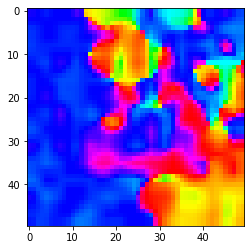

In [43]:
plt.imshow(norm_trainset[2])

In [48]:
train_data = norm_trainset
train_data = np.reshape(train_data, (len(train_data),-1))

In [ ]:
pca = skl.decomposition.PCA()
pca_train = pca.fit_transform(train_data)

(39209, 50, 50, 3)